In [54]:
import pickle
import os
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

In [86]:
ex = '2024-03-21_15:14:50.457724_her3_sdcn/'
ex = '2024-03-27_10:40:08.007939_her3_sdcn/'
ex = '2024-03-27_10:46:18.085608_her3_sdcn/'
ex = '2024-03-27_11:03:57.966009_her3_sdcn/'
ex = '2024-03-27_11:16:17.714245_her3_sdcn/'

In [87]:
i=0
connect_path = ex+"connection_pairs_"+str(i)+".pkl"  
feat_path = ex+"features_"+str(i)+".pkl"
label_path = ex+"labels_"+str(i)+".pkl"

In [88]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")
    model_name = path.split('_')[-1]

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    with open(os.path.join(path, 'commandline_arguments.p'), 'rb') as file:
        command_line = pickle.load(file)
    
    return domain, vec_d, vec_y, img_locs, model_name, df, command_line

In [89]:
try:
    domain, vec_d, vec_y, img_locs, model_name, df, command_line = load_files(ex)
except:
    'no data'
    

In [90]:
print(command_line)

Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=1, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=20, epos_min=0, epo_te=1, warmup=100, debug=False, dmem=False, no_dump=False, trainer='sdcn', out='zoutput', dpath='../../HER2/combined_train', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath='domid/algos/builder_sdcn.py', exptag='exptag', aggtag='aggtag', bm_dir=None, plot_data=None, outp_dir='zoutput/benchmarks/shell_benchmark', param_idx=True, msel='val', model='sdcn', acon=None, task='her3', bs=168, split=0.0, te_d=['0'], tr_d=['0', '1', '2', '3'], san_check=False, san_num=8, loglevel='DEBUG', shuffling_off=True, zd_dim=50, zx_dim=0, zy_dim=64, topic_dim=3, nname_encoder_x2topic_h=None, npath_encoder_x2topic_h=None, nname_encoder_sandwich_x2h4zd=None, npath_encoder_sandwich_x2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, tau=0.05, epos_per_match_up

In [91]:
with open(connect_path, "rb") as file:
    connection_pairs = pickle.load(file)
with open(feat_path, "rb") as file:
    features = pickle.load(file)
with open(label_path, "rb") as file:
    labels = pickle.load(file)

In [92]:
print(features.shape, '\n',len(labels), labels[0])

torch.Size([168, 12288]) 
 168 ../../HER2/combined_train/class1jpg/9981-5013,5325FD.jpg


In [93]:
print(168*4)

672


In [94]:
len(connection_pairs)/168

9.0

In [95]:
import numpy as np
np.sqrt(12288/3)

64.0

In [96]:
def plot_graph(edges, labels, bs):

    num_nodes = len(edges)

    # for i in range(num_nodes):
    #     for j in range(i + 1, num_nodes):  # Exclude diagonal and symmetric entries
    #         if adjacency_matrix[i, j] != 0:
    #             edges.append((i, j))
    ed= [(edge[0], edge[1]) for edge in edges]
    #labels = {0: '0', 1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6'}
    labels_color= {0:'blue', 1:'navy', 2:'green',3:'yellow', 4:'orange', 5: 'navy',
                  6: 'pink', 7:'purple', 8:'grey', 9:'salmon'}
    graph = nx.Graph(ed)
    node_labels = [labels[node].item() for node in graph.nodes()]
    node_colors = [labels_color[node_label] for node_label in node_labels]
    print(node_colors)
    pos = nx.random_layout(graph)  # Specify the layout for node positions
    #pos = nx.planar_layout(graph)
    nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False)
    plt.show()
    # plt.savefig("../../graph_bs_"+str(bs)+".png")
    # plt.close()


In [97]:
features_ = features.reshape(len(features), 3, 64, 64)

In [123]:
import matplotlib.pyplot as plt

def visualize_per_node_connections(features, connections, labels):
    print(connections)
    fs_title =20
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 4, 1)
    
    img = features[connections[0][0], :, :, :].permute(1, 2 , 0)
    plt.imshow(img)
    plt.title('Node\n'+'subject'+labels[connections[0][0]][35:40]+'\n'+labels[connections[0][0]][26:32]+ '\n scanner '+labels[connections[0][0]][-6:],fontsize=fs_title, weight='bold')

    for i in range(0, len(connections)):
        
        plt.subplot(3, 4, i + 2)
        connected_to_idx = connections[i][1]
        img = features[connected_to_idx, :, :, :].permute(1 , 2, 0)
        print(labels[connected_to_idx])
        plt.imshow(img)
        plt.title('Connected to '+str(connected_to_idx)+'\n subject'+labels[connected_to_idx][35:40]+'\n'+labels[connected_to_idx][26:32]+ '\n scanner '+labels[connected_to_idx][-6:],fontsize=fs_title, weight='bold' )

    plt.show()


[[0, 66], [0, 33], [0, 44], [0, 70], [0, 84], [0, 27], [0, 68], [0, 103], [0, 98]]
../../HER2/combined_train/class2jpg/9981-9613,9562FD.jpg
../../HER2/combined_train/class2jpg/8811-22044,13754FD.jpg
../../HER2/combined_train/class2jpg/9981-8776,12259FD.jpg
../../HER2/combined_train/class2jpg/s06-9179-a-14757-22539FD.jpg
../../HER2/combined_train/class2jpg/S04-3584-13315-15947FD.jpg
../../HER2/combined_train/class2jpg/6501-5FD.jpg
../../HER2/combined_train/class2jpg/6501-1FD.jpg
../../HER2/combined_train/class2jpg/9981-7396,13328FD.jpg
../../HER2/combined_train/class2jpg/9981-8612,1379FD.jpg


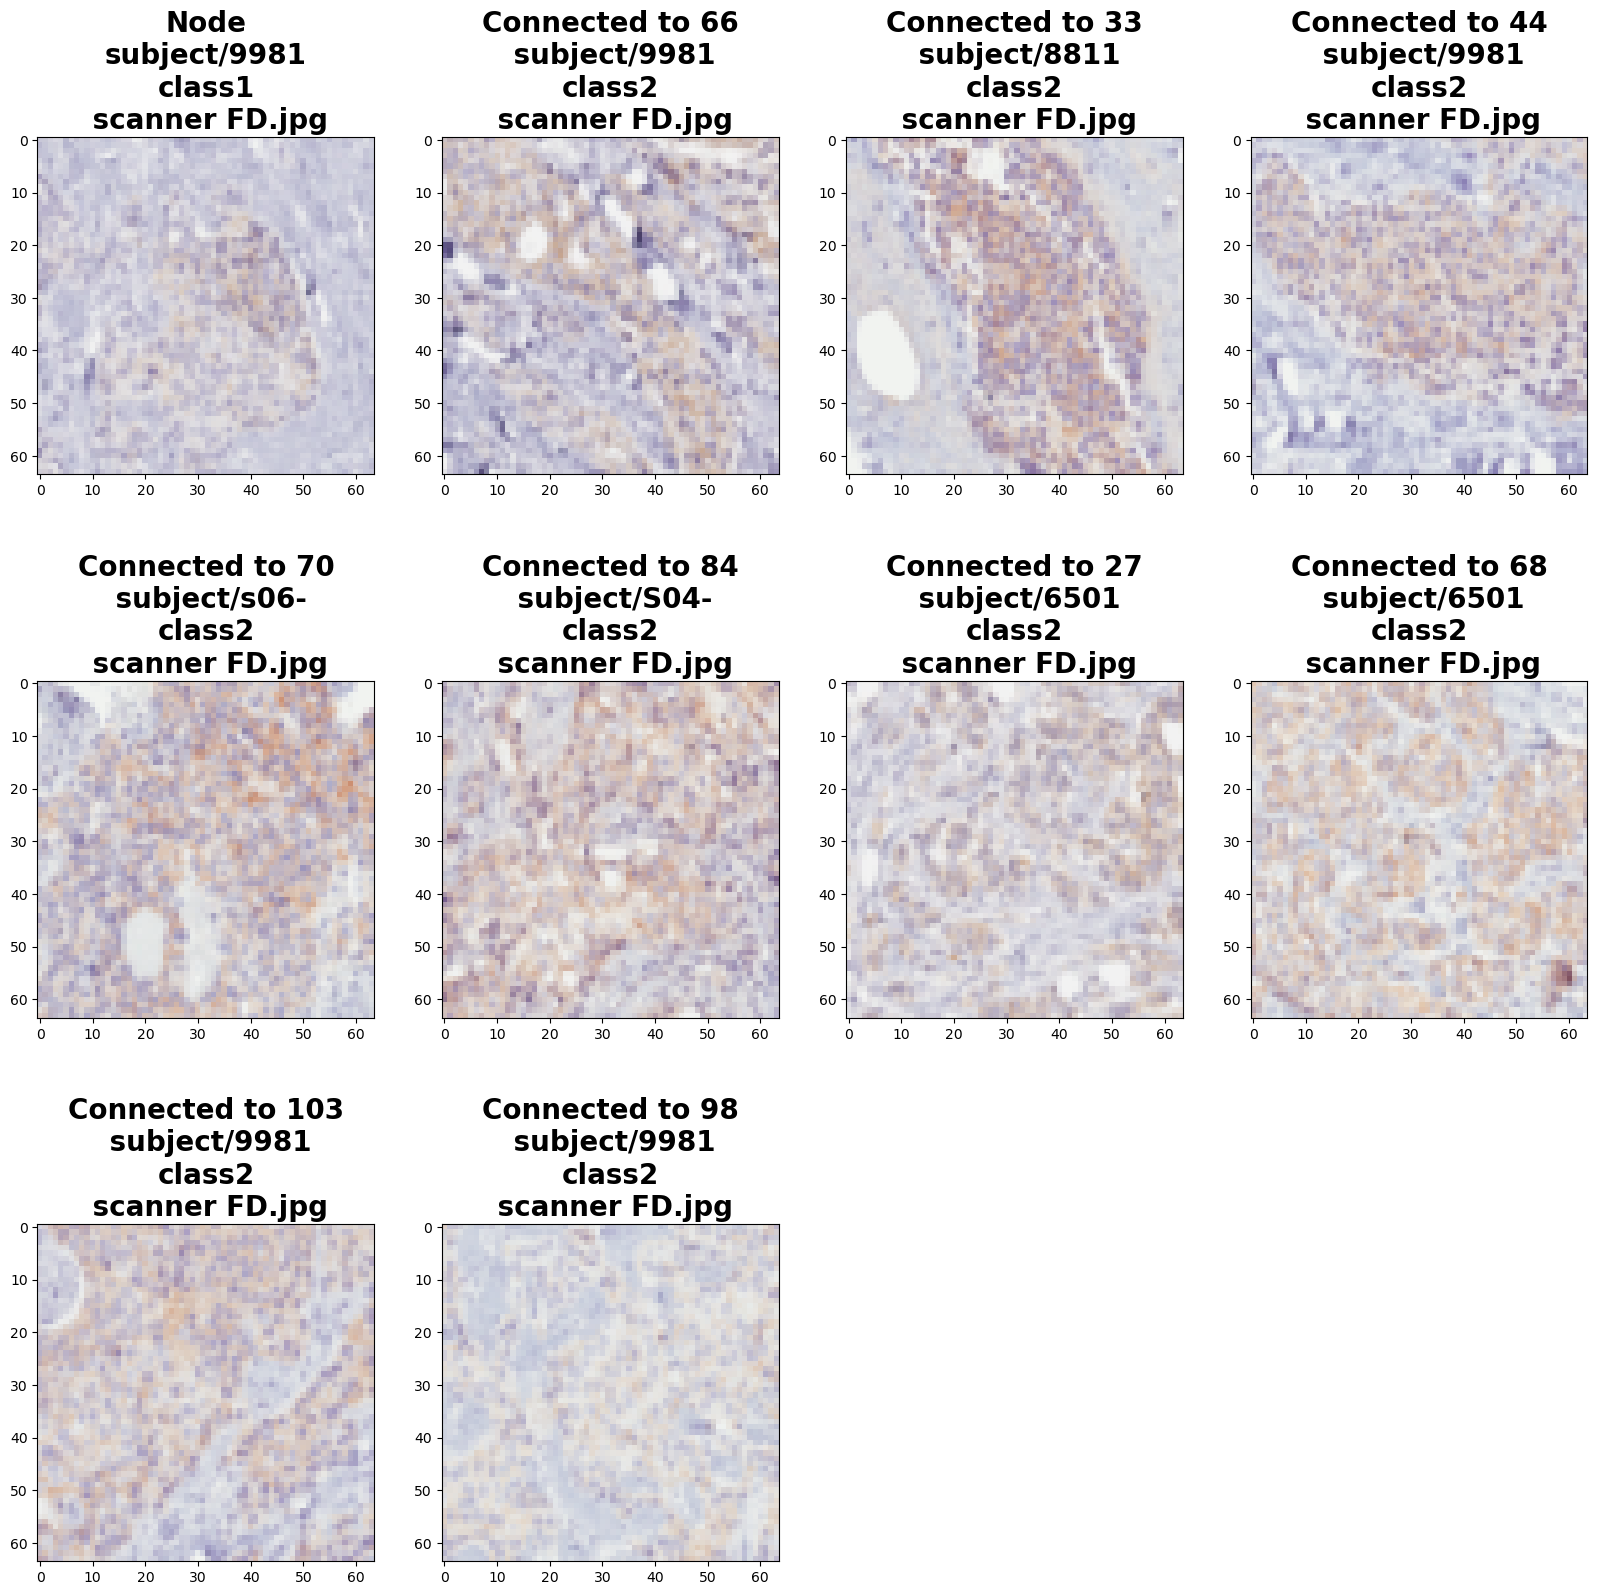

In [124]:
visualize_per_node_connections(features_, connection_pairs[0:9], labels)

[[1, 58], [1, 60], [1, 59], [1, 61], [1, 54], [1, 56], [1, 55], [1, 167]]
../../HER2/combined_train/class2jpg/S06-6377-18584-23026FD.jpg
../../HER2/combined_train/class2jpg/S05-1147-3140-6470FD.jpg
../../HER2/combined_train/class2jpg/9981-9947,10020FD.jpg
../../HER2/combined_train/class2jpg/S04-6577-13144-14557FD.jpg
../../HER2/combined_train/class2jpg/S04-6577-15603-12089FD.jpg
../../HER2/combined_train/class2jpg/S04-6537-21861-21344FD.jpg
../../HER2/combined_train/class2jpg/S05-1147-14631-10906FD.jpg
../../HER2/combined_train/class3jpg/s05-555-19084-20723FD.jpg


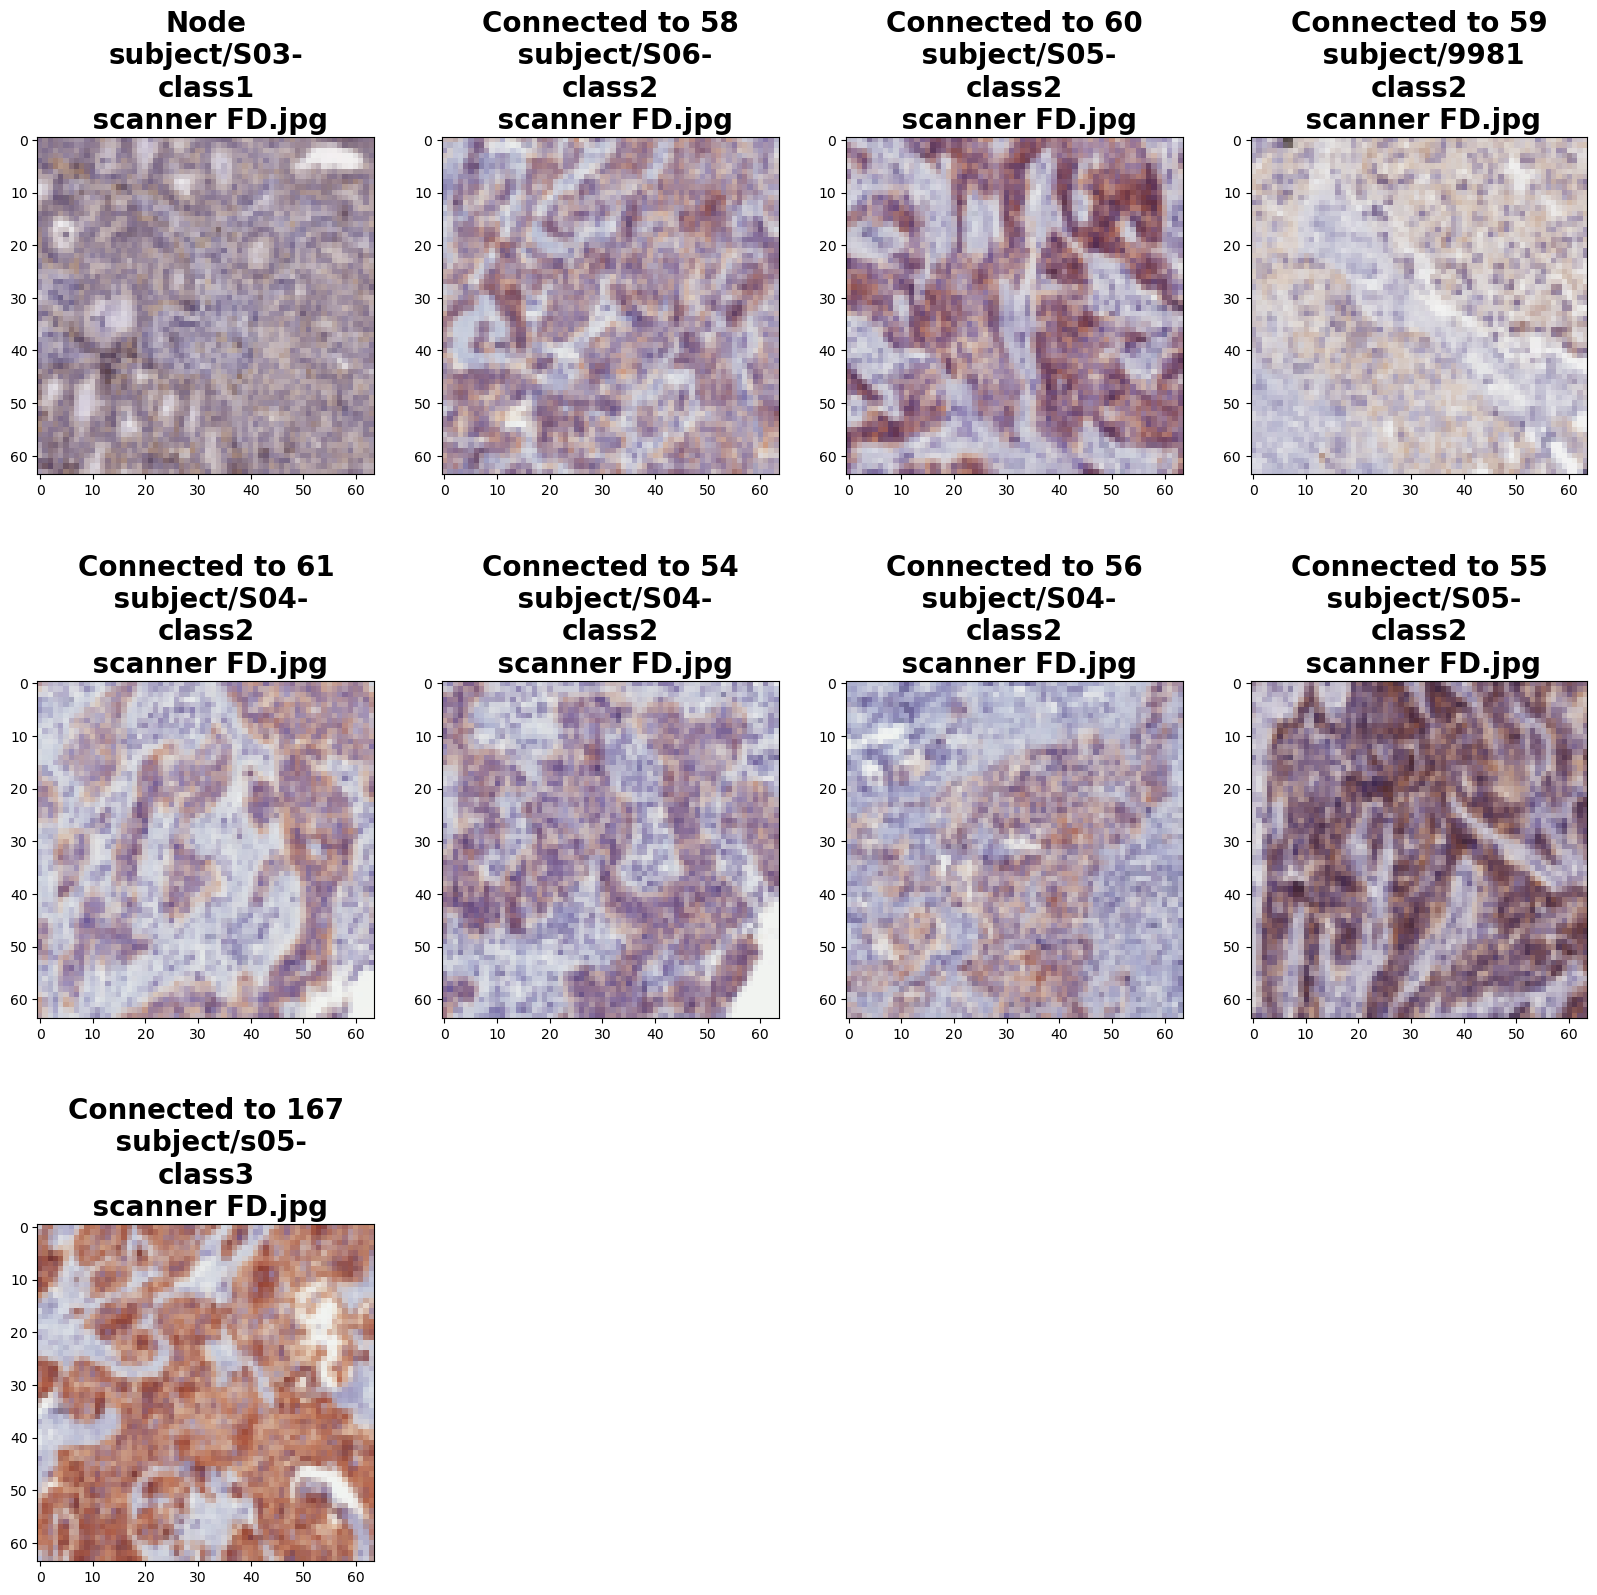

In [125]:
visualize_per_node_connections(features_, connection_pairs[10:18], labels)

[[2, 33], [2, 70], [2, 59], [2, 18], [2, 103], [2, 52], [2, 94], [2, 0]]
../../HER2/combined_train/class2jpg/8811-22044,13754FD.jpg
../../HER2/combined_train/class2jpg/s06-9179-a-14757-22539FD.jpg
../../HER2/combined_train/class2jpg/9981-9947,10020FD.jpg
../../HER2/combined_train/class2jpg/9981-8970,10677FD.jpg
../../HER2/combined_train/class2jpg/9981-7396,13328FD.jpg
../../HER2/combined_train/class2jpg/S04-6537-19553-22436FD.jpg
../../HER2/combined_train/class2jpg/s06-9179-a-16478-25792FD.jpg
../../HER2/combined_train/class1jpg/9981-5013,5325FD.jpg


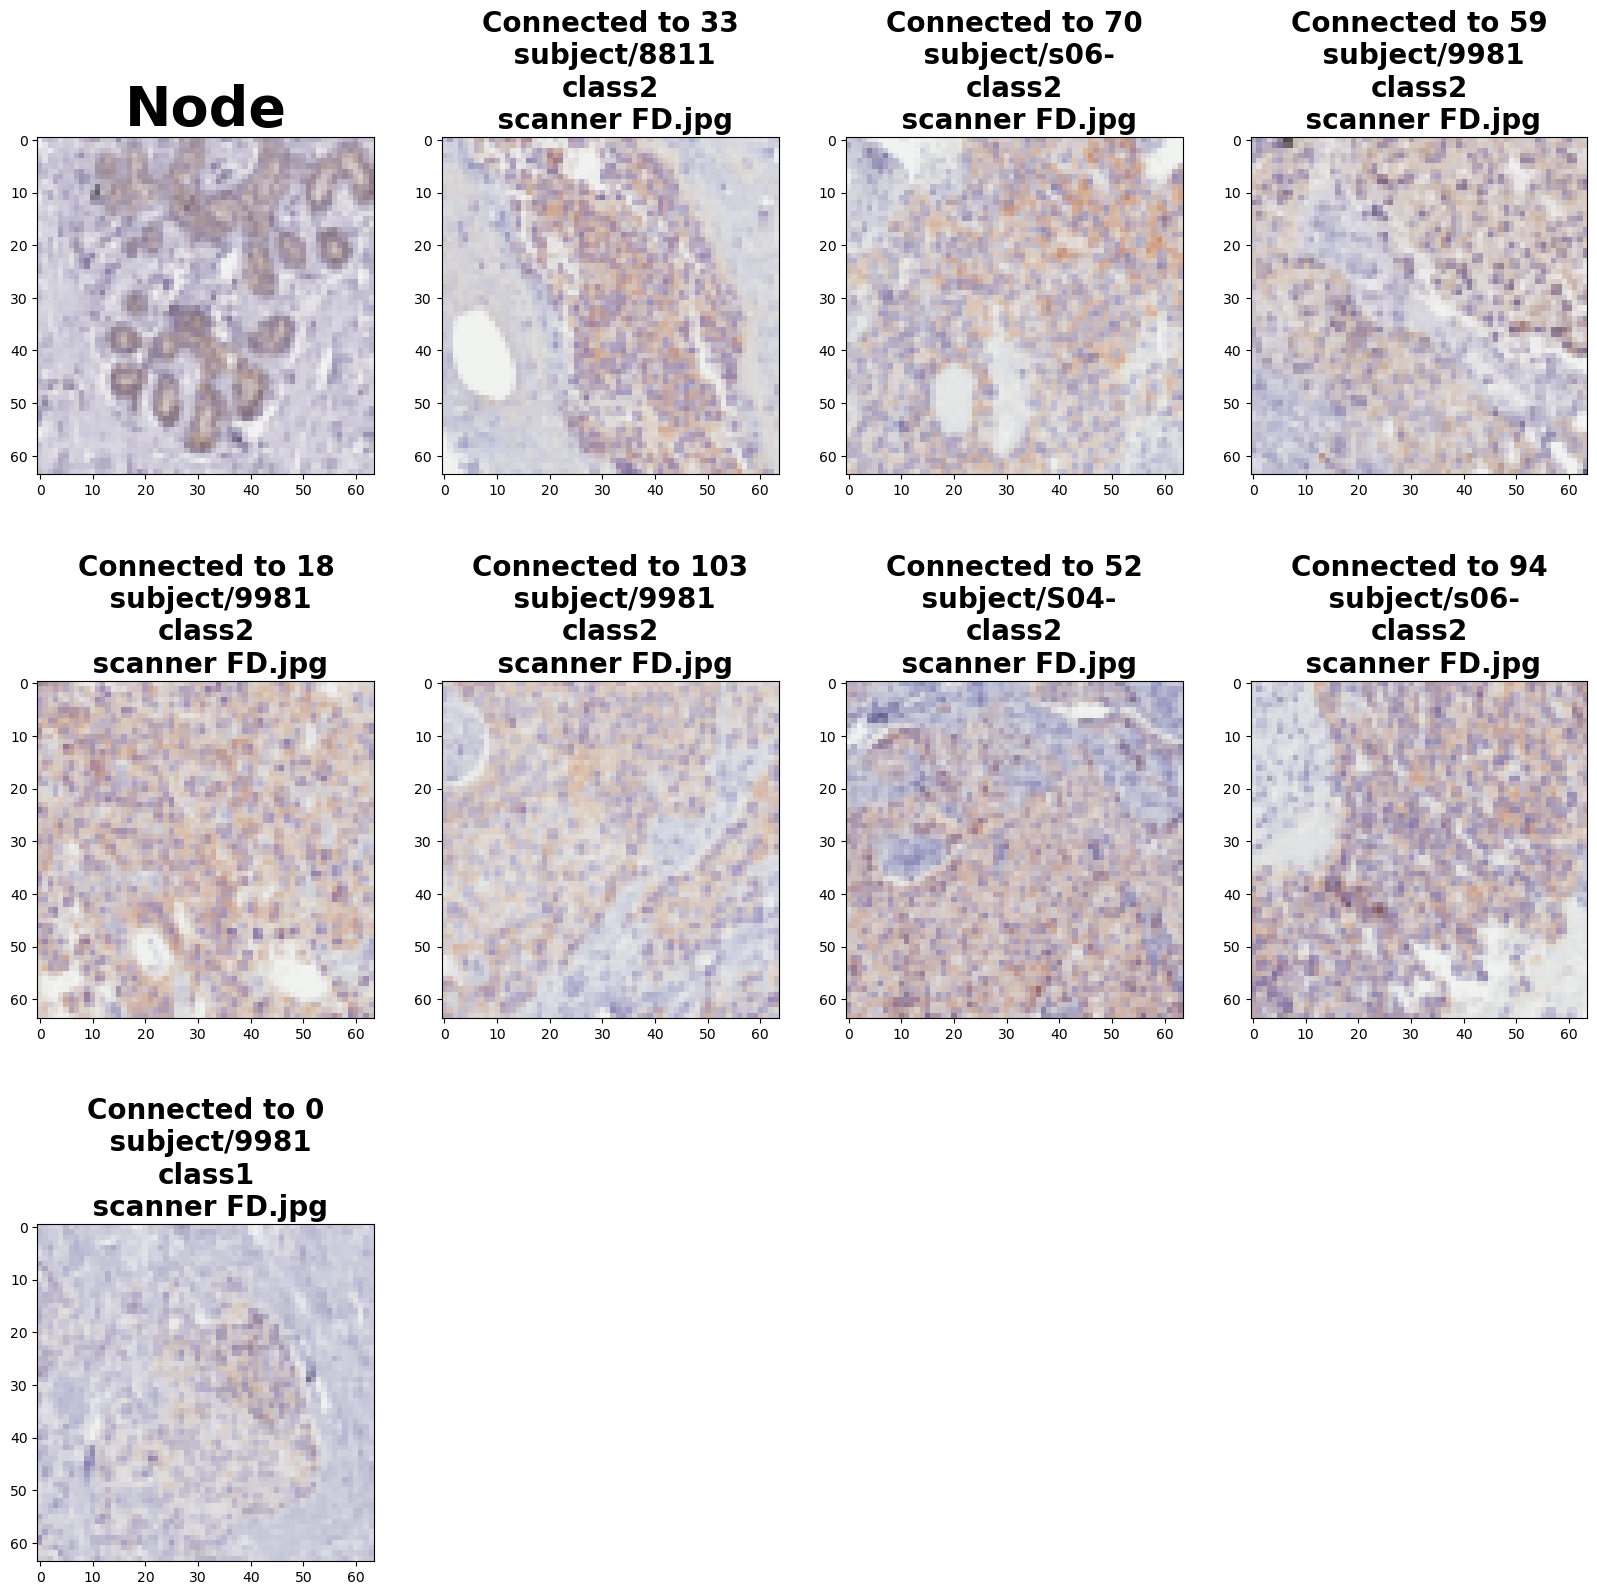

In [118]:
visualize_per_node_connections(features_, connection_pairs[19:27], labels)